In [1]:
#%pip install nltk

In [50]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            
import random    
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 1. Understanding the NLTK Twitter Dataset
As can be seen, the dataset contains 5,000 positive and 5,000 negative tweets

In [61]:
nltk.download('twitter_samples')

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:
print("# positive tweets:", len(all_positive_tweets))
print("# negative tweets:", len(all_negative_tweets))
print("The type of all_positive_tweets is:", type(all_positive_tweets))
print("The type of each tweets is:", type(all_positive_tweets[0]))

# positive tweets: 5000
# negative tweets: 5000
The type of all_positive_tweets is: <class 'list'>
The type of each tweets is: <class 'str'>


### Pie Chart Visualization

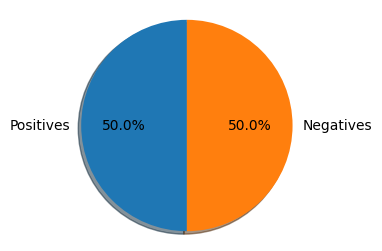

In [6]:
# Declare a figure with custom size
fig = plt.figure(figsize=(3, 3))

# labels for the two classes
labels = 'Positives', 'Negatives'

# Sizes for each sentiment
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Draw plot as a circle.
plt.axis('equal')  

# Display chart
plt.show()

## Example Tweets

In [7]:
# positive = green, negative = red
print('\033[92m' + all_positive_tweets[random.randint(0, 5000)])
print('\033[91m' + all_negative_tweets[random.randint(0, 5000)])

Morning Everyone,

We're open from 12pm every day until Sunday now :) 

Hello Weekend, come say 'how do you do?' x http://t.co/PTZfvCIUa9
@abhic4ever Terrible, just terrible. :(


# 2. Preprocessing Raw Text for Sentiment Analysis
1. Eliminate handles and URLS
2. Tokenize strings into words
3. Remove stop words and punctuation
4. Stemming: Convert every word to stem
5. Lower case all

In [62]:
# download the stopwords from NLTK
nltk.download('stopwords')

In [9]:
import re                                  # library for regular expression operations
import string                              
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [10]:
# Load Example Tweet
example_tweet = all_positive_tweets[2277]
print(example_tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


### Remove hyperlinks, Twitter marks and styles

In [11]:
def eliminate_handles_and_links(tweet):
    # Remove retweets
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#', '', tweet)
    return tweet

example_tweet = eliminate_handles_and_links(example_tweet)
example_tweet

'My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… '

### Tokenize Tweets

In [12]:
def tokenize(tweet):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens

example_tweet_tokens = tokenize(example_tweet)
example_tweet_tokens

['my',
 'beautiful',
 'sunflowers',
 'on',
 'a',
 'sunny',
 'friday',
 'morning',
 'off',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 'off',
 '…']

### Remove Stop Words and Punctuation

In [13]:
english_stopwords = stopwords.words('english')
print('Stop Words\n', english_stopwords)

punctuation = string.punctuation
print('\npunctuation\n', punctuation)

Stop Words
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [14]:
def remove_stops_and_punctation(tweet_tokens):
    english_stopwords = stopwords.words('english')

    tokens = []
    for token in tweet_tokens:
        if token not in english_stopwords and token not in string.punctuation:
            tokens.append(token)
    return tokens

example_tweet_tokens = remove_stops_and_punctation(example_tweet_tokens)
example_tweet_tokens

['beautiful',
 'sunflowers',
 'sunny',
 'friday',
 'morning',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 '…']

### Stemming

In [15]:
def stem_words(tweet_tokens):
    # Use Porter Stemmer
    stemmer = PorterStemmer()
    words = []
    for word in tweet_tokens:
        stemmed_word = stemmer.stem(word)
        words.append(stemmed_word)
    return words

example_tweet_tokens = stem_words(example_tweet_tokens)

print(example_tweet_tokens)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## Process Tweet Function
We now combine all of the preprocessing functions into one function, which returns the final preprocessed tweet that we can use for sentiment analysis

In [16]:
# Eliminate handles and URLS
# Tokenize strings into words
# Remove stop words and punctuation
# Stemming: Convert every word to stem
# Lower case all
def process_tweet(tweet):
    """Process Tweets into tokens.
    Input:
        tweet: a tweet
    Output:
        tweet_tokens: a list containing each token/word that 
        provides information from the original tweet
    """
    tweet = eliminate_handles_and_links(tweet)
    tweet_tokens = tokenize(tweet)
    tweet_tokens = remove_stops_and_punctation(tweet_tokens)
    tweet_tokens = stem_words(tweet_tokens)
    return tweet_tokens

In [17]:
# Compare original example with preprocessed example
example_tweet = all_positive_tweets[2277]
processed_example_tweet = process_tweet(example_tweet)
print("Original Tweet\n", example_tweet)
print("Processed Tweet\n", processed_example_tweet)

Original Tweet
 My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
Processed Tweet
 ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


# 3. Building and Visualizing Word Frequencies

In [18]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            0 if negative, 1 if positive
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for tweet, y in zip(tweets, yslist):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

In [19]:
tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

freqs = build_freqs(tweets, labels)
#freqs

In [20]:
print("freqs type:", type(freqs))
print("freqs len:", len(freqs))

freqs type: <class 'dict'>
freqs len: 13170


### Table of Word Counts
For a few words of choice, store in format [word, # positive, # negative]

In [21]:
# Word of choice
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# each element has pattern: [<word>, <positive_count>, <negative_count>]
word_counts = []

# loop through selected words
for word in keys:
    # get positive and negative counts
    positive = freqs.get((word, 1), 0)
    negative = freqs.get((word, 0), 0)

    word_counts.append([word, positive, negative])

word_counts

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

### Plotting Words by Ratio of Positive to Negative Counts
To account for large discrepancies in counts and make the graph more balanced, we first convert the counts to a logarithmic scale.

Words above the line tend to be more negative, while words below the line tend to be more positive

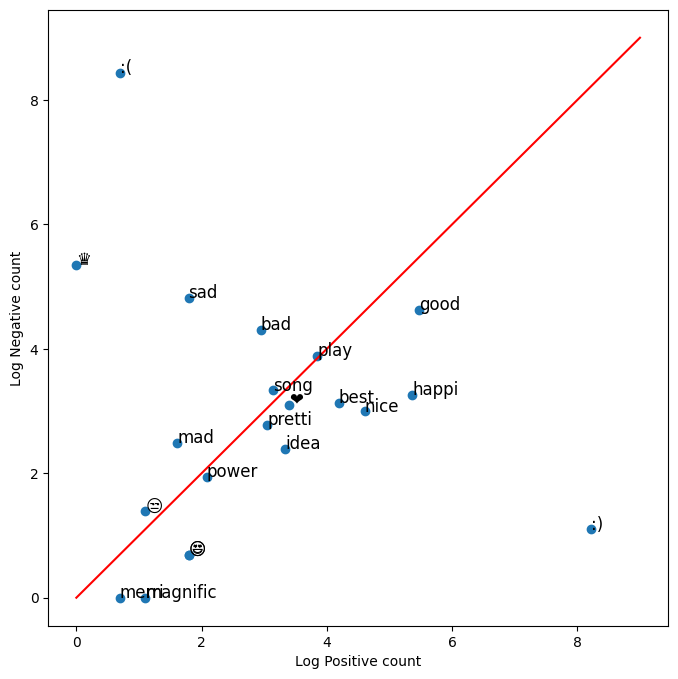

In [22]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in word_counts])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in word_counts]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as label for corresponding points
for i in range(0, len(word_counts)):
    word = word_counts[i][0]
    ax.annotate(word, (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

# 4. Training Model

### Create Test and Train Sets

In [23]:
train_pos, train_neg = all_positive_tweets[:4000], all_negative_tweets[:4000]
test_pos, test_neg = all_positive_tweets[4000:], all_negative_tweets[4000:]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [24]:
print("train_y shape", train_y.shape)
print("test_y shape", test_y.shape)

train_y shape (8000, 1)
test_y shape (2000, 1)


In [25]:
# From above, func preprocesses tweets and gets positive and negative frequencies of each word
freqs = build_freqs(train_x, train_y)

In [26]:
print("type(freqs) = ", type(freqs))
print("len(freqs) = ", len(freqs.keys()))

type(freqs) =  <class 'dict'>
len(freqs) =  11426


### Sigmoid Function

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
assert sigmoid(0) == 0.5
assert sigmoid(4.92) == 0.9927537604041685

### Cost Function

In [28]:
def cost_function(h, y):
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

### Gradient Descent

In [37]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations to train your model for
    Output:
        J: the final cost
        theta: final weight vector
    '''
    # m = number of rows in matrix x
    m = len(x)

    # run gradient descent num_iters times
    for i in range(0, num_iters):
        # if i % 25 == 0:
        #     print(i)
        z = np.dot(x, theta)
        h = sigmoid(z)
        
        # calculate the cost for logistic regression model
        J = -(np.dot(y.T, np.log(h)) + np.dot(1-y.T, np.log(1 - h))) / m

        # update the weights theta
        theta = theta - alpha * np.dot(x.T, (h - y)) / m
        
    J = J.item()
    return J, theta

### Extract features

In [38]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input:
        tweet: string of a tweet
        freqs: dictionary containing frequencies of each tuple (word, label)
    Output:
        features: vector of dimension (1, 3) for entire tweet
    '''
    word_tokens = process_tweet(tweet)

    # initialize features vector with bias of 1
    features = np.zeros(3)
    features[0] = 1
    
    for word in word_tokens:
        features[1] += freqs.get((word, 1), 0) # positive
        features[2] += freqs.get((word, 0), 0) # negative

    # Convert features from 1D to 2D array for batching
    features = features[None, :]
    return features


### Train Model

In [52]:
# Collect features for each tweet and stack them into matrix X
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs, process_tweet)

Y = train_y

J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1600)

print(f"Cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

Cost after training is 0.21782709.
The resulting vector of weights is [6e-08, 0.00055908, -0.00057567]


# 5. Performance
As can be seen, the model achieves an impressive 99.5% accuracy on the test set.

In [53]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input:
        tweet: string
        freqs: dictionary with frequencies of each tuple
        theta: (3, 1) vector of weights
    Output:
        y_pred: Probability of tweet being positive
    '''
    x = extract_features(tweet, freqs)
    y_pred = sigmoid(np.dot(x, theta))

    return y_pred

In [54]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'Fun times we had! :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.83914429]])

In [55]:
def test_accuracy(test_x, test_y, freqs, theta):
    y_hat = []
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred > 0.5: # positive
            y_hat.append(1)
        else:
            y_hat.append(0)

    y_hat = np.array(y_hat)
    test_y = np.squeeze(test_y)
    accuracy = np.mean(y_hat == test_y)
    return accuracy

In [56]:
print("Test Accuracy =", test_accuracy(test_x, test_y, freqs, theta))

Test Accuracy = 0.995


# 6. Error Analysis

In [60]:
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('Original Tweet:', x)
        print('Processed Tweet:', process_tweet(x))
        print("prediction: ", y_hat, "actual: ", y)
        print("")

Original Tweet: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
Processed Tweet: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
prediction:  [[0.48952369]] actual:  [1.]

Original Tweet: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
Processed Tweet: ["i'm", 'play', 'brain', 'dot', 'braindot']
prediction:  [[0.48390803]] actual:  [1.]

Original Tweet: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
Processed Tweet: ["i'm", 'play', 'brain', 'dot', 'braindot']
prediction:  [[0.48390803]] actual:  [1.]

Original Tweet: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY
Processed Tweet: ["i'm", 'play', 'brain', 'dot', 'braindot']
prediction:  [[0.48390803]] actual:  [1.]

Original Tweet: off to the park to get so